## ASSIGNMENT 3 - Pollution Analysis

Matteo Gandini, Giulia Ghiazza

In [6]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_original = pd.read_csv('pollution.csv')
print(df_original.shape)
df_original.head(5) #We fount that they are not in order

(14000, 13)


,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000
3,11,NaN,NaN,NaN,NaN,20.0,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923
4,0,77.0,57.0,41.0,48.0,16.0,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000


In [8]:
# counting NaN
print(df_original.isnull().sum())
n_nan_rows = df_original.isna().any(axis=1).sum()
print(n_nan_rows)

hour            0
small_part    332
med_part      251
sulf_diox     309
nitr_diox     338
trioxygen     437
temp           15
pres           14
rain           15
wind           45
wind_sp        11
date            0
carb_monox      0
dtype: int64
774


In [9]:
df = df_original.dropna() #drop nan variables
df = df.drop(df[df['date'] == "29-Feb-2017"].index)  #doesn't exist
print(df.shape)

(13226, 13)
(13215, 13)


In [10]:
#check datatypes
print(df.columns)
print(df.dtypes)

Index(['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen',
       'temp', 'pres', 'rain', 'wind', 'wind_sp', 'date', 'carb_monox'],
      dtype='object')
hour            int64
small_part    float64
med_part      float64
sulf_diox     float64
nitr_diox     float64
trioxygen     float64
temp          float64
pres          float64
rain          float64
wind           object
wind_sp       float64
date           object
carb_monox    float64
dtype: object


In [11]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

(13215, 2)


,wind,date
0,NNW,23-Oct-2014
1,W,9-Jan-2016
2,SSE,11-Jul-2016
4,SSW,7-Feb-2015
6,E,20-Jul-2016


In [12]:
df_categorical['date'] = pd.to_datetime(df_categorical['date'],format='%d-%b-%Y')
df_categorical['giorno'] = df_categorical['date'].dt.day
df_categorical['mese'] = df_categorical['date'].dt.month
df_categorical['anno'] = df_categorical['date'].dt.year
df_categorical = df_categorical.drop(['date'], axis=1)
print(df_categorical.shape)
df_categorical.head()

(13215, 4)


,wind,giorno,mese,anno
0,NNW,23,10,2014
1,W,9,1,2016
2,SSE,11,7,2016
4,SSW,7,2,2015
6,E,20,7,2016


In [13]:
df_numerical=df.select_dtypes(include=[np.number])
df_numerical.head()

(13215, 11)


,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,2.5,200.0
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,0.7,2100.0
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,0.4,700.0
4,0,77.0,57.0,41.0,48.0,16.0,-1.0,1024.2,0.0,1.3,1300.0
6,19,104.0,104.0,2.0,18.0,158.0,27.4,996.8,0.0,1.3,800.0


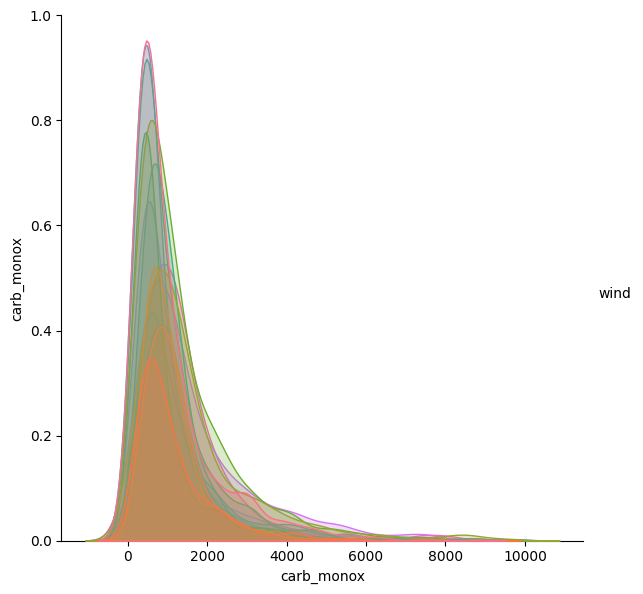

In [14]:
sns.pairplot(data=df[["wind","carb_monox"]], hue="wind", height=6)

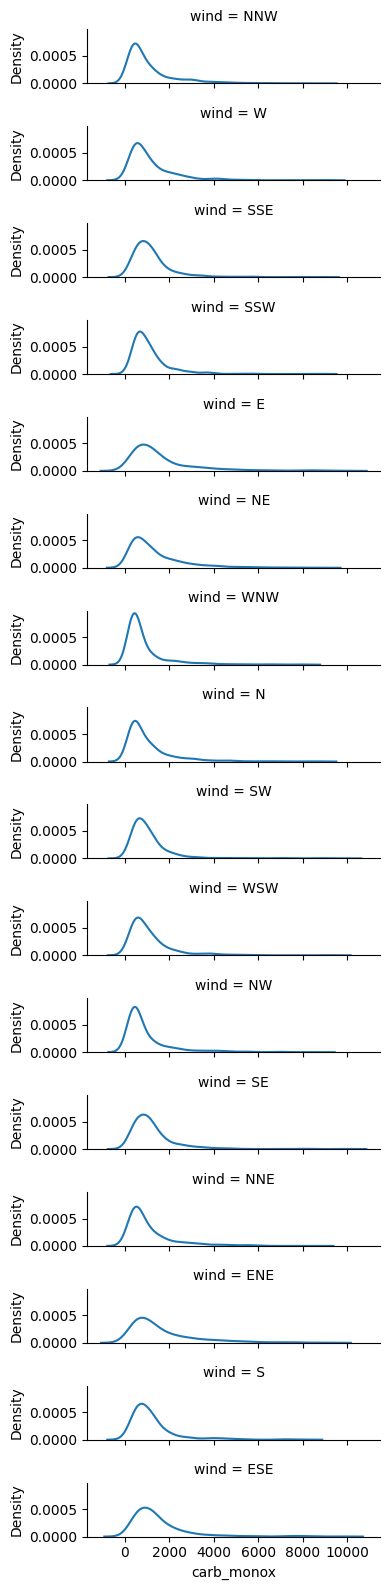

In [15]:
g = sns.FacetGrid(df, row="wind", 
                  height=1, aspect=4,)
g.map(sns.kdeplot, "carb_monox")
#the variable is expectetd to be correlated to the target since as shown in the graphics below we observe different distributions for different winds

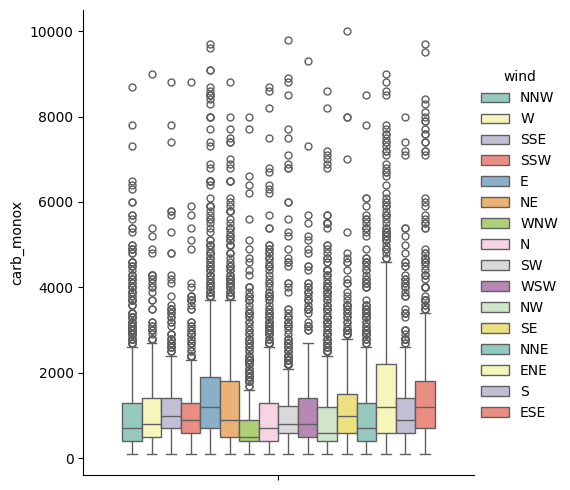

In [16]:
sns.catplot(data=df, hue="wind", y="carb_monox",kind="box", palette="Set3")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41524\1561373759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_categorical, x=i, y="carb_monox",
C:\Users\ASUS\AppData\Local\Temp\ipykernel_41524\1561373759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_categorical, x=i, y="carb_monox",
C:\Users\ASUS\AppData\Local\Temp\ipykernel_41524\1561373759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_categorical, x=i, y="carb_monox",


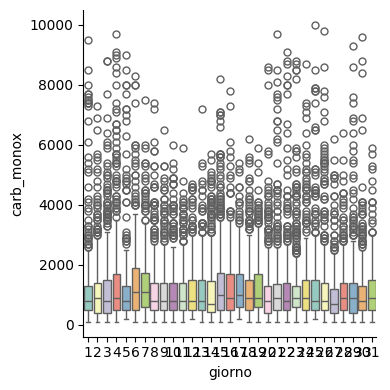

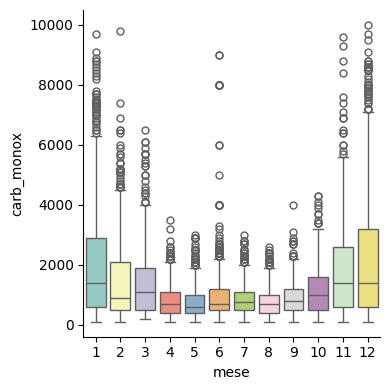

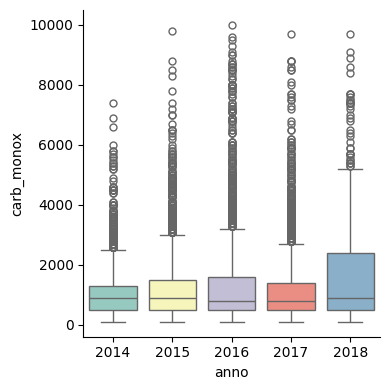

  wind  giorno  mese  anno
0  NNW      23    10  2014
1    W       9     1  2016
2  SSE      11     7  2016
4  SSW       7     2  2015
6    E      20     7  2016
(13215, 4)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df_categorical["carb_monox"]=df["carb_monox"]
for i in df_categorical.columns[1:-1]:
    sns.catplot(data=df_categorical, x=i, y="carb_monox",
            kind="box", palette="Set3",height=4);
plt.show()
df_categorical = df_categorical.drop(["carb_monox"], axis=1)
print(df_categorical.head())
print(df_categorical.shape)

In [ ]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 
dummies.head()

(13215, 60)


,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,wind_SSE,...,mese_4,mese_5,mese_6,mese_7,mese_8,mese_9,anno_2015,anno_2016,anno_2017,anno_2018
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


array([[<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'small_part'}>,
        <Axes: title={'center': 'med_part'}>],
       [<Axes: title={'center': 'sulf_diox'}>,
        <Axes: title={'center': 'nitr_diox'}>,
        <Axes: title={'center': 'trioxygen'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'pres'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'wind_sp'}>,
        <Axes: title={'center': 'carb_monox'}>, <Axes: >]], dtype=object)

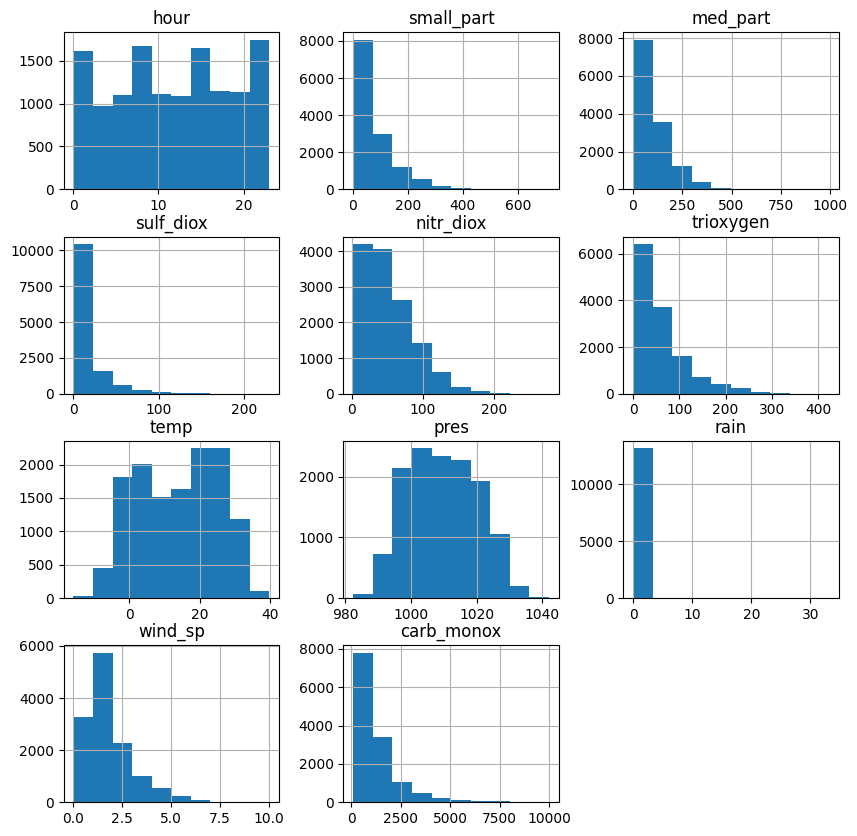

In [19]:
df_numerical.hist(figsize=(10,10))

In [20]:
import math
df_numerical['log_med_part']=df_numerical['med_part'].apply(lambda x: math.log(x+1))
df_numerical['log_sulf_diox']=df_numerical['sulf_diox'].apply(lambda x: math.log(x+1))
df_numerical['log_trioxygen']=df_numerical['trioxygen'].apply(lambda x: math.log(x+1))
df_numerical['log_rain']=df_numerical['rain'].apply(lambda x: math.log(x+1))
df_numerical['log_carb_monox']=df_numerical['carb_monox'].apply(lambda x: math.log(x+1))

array([[<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'small_part'}>,
        <Axes: title={'center': 'med_part'}>,
        <Axes: title={'center': 'sulf_diox'}>],
       [<Axes: title={'center': 'nitr_diox'}>,
        <Axes: title={'center': 'trioxygen'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'wind_sp'}>,
        <Axes: title={'center': 'carb_monox'}>,
        <Axes: title={'center': 'log_med_part'}>],
       [<Axes: title={'center': 'log_sulf_diox'}>,
        <Axes: title={'center': 'log_trioxygen'}>,
        <Axes: title={'center': 'log_rain'}>,
        <Axes: title={'center': 'log_carb_monox'}>]], dtype=object)

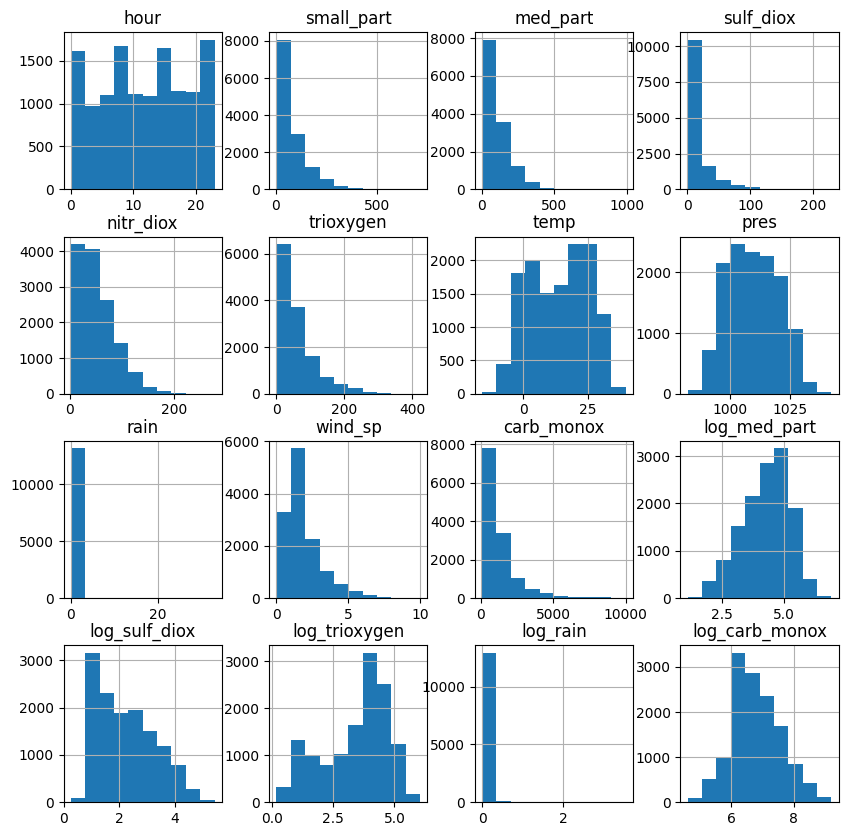

In [21]:
df_numerical.hist(figsize=(10,10))

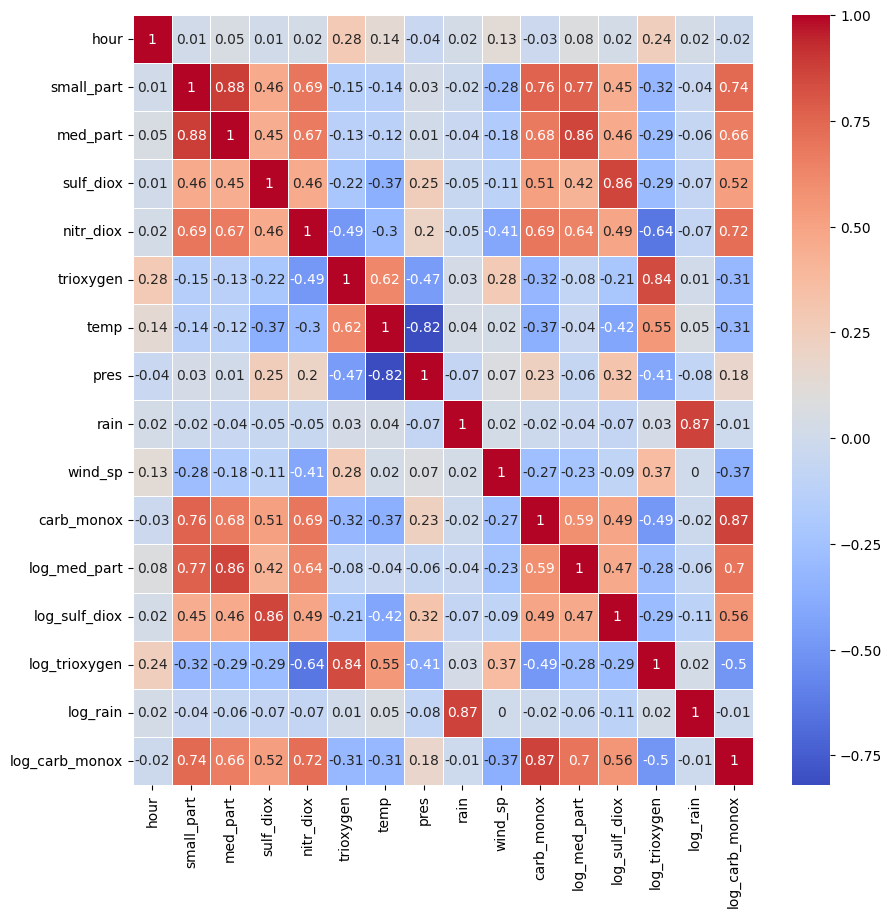

In [ ]:
#cross-correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.6, annot=True, annot_kws={"size":10})
plt.show()
# We can remove highly correlated variables 

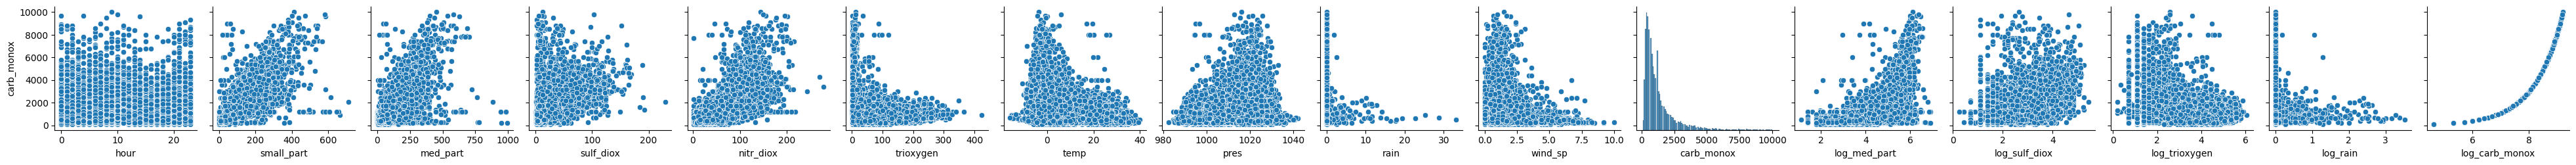

In [23]:
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='carb_monox')

In [24]:
df_numerical=df_numerical.drop(["med_part"], axis=1)
df_numerical=df_numerical.drop(["sulf_diox"], axis=1)
df_numerical=df_numerical.drop(["trioxygen"], axis=1)
df_numerical=df_numerical.drop(["rain"], axis=1)
print(df_numerical.shape)

(13215, 12)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns
print(scaled_df.shape)

(13215, 12)


In [26]:
df_numerical_mod=scaled_df.drop(["carb_monox"], axis=1)
df_numerical_mod=df_numerical_mod.drop(["log_carb_monox"], axis=1)
print(df_numerical_mod.shape)

(13215, 10)


In [27]:
# Reuniting the two datasets
dummies = dummies.reset_index(drop=True)
df_numerical_mod = df_numerical_mod.reset_index(drop=True)
X=pd.concat([dummies, df_numerical_mod], axis = 1)
print(X.columns)
print(X.shape)
y=df['carb_monox'].apply(lambda x: math.log(x+1))
X.tail(5)

Index(['wind_ENE', 'wind_ESE', 'wind_N', 'wind_NE', 'wind_NNE', 'wind_NNW',
       'wind_NW', 'wind_S', 'wind_SE', 'wind_SSE', 'wind_SSW', 'wind_SW',
       'wind_W', 'wind_WNW', 'wind_WSW', 'giorno_10', 'giorno_11', 'giorno_12',
       'giorno_13', 'giorno_14', 'giorno_15', 'giorno_16', 'giorno_17',
       'giorno_18', 'giorno_19', 'giorno_2', 'giorno_20', 'giorno_21',
       'giorno_22', 'giorno_23', 'giorno_24', 'giorno_25', 'giorno_26',
       'giorno_27', 'giorno_28', 'giorno_29', 'giorno_3', 'giorno_30',
       'giorno_31', 'giorno_4', 'giorno_5', 'giorno_6', 'giorno_7', 'giorno_8',
       'giorno_9', 'mese_10', 'mese_11', 'mese_12', 'mese_2', 'mese_3',
       'mese_4', 'mese_5', 'mese_6', 'mese_7', 'mese_8', 'mese_9', 'anno_2015',
       'anno_2016', 'anno_2017', 'anno_2018', 'hour', 'small_part',
       'nitr_diox', 'temp', 'pres', 'wind_sp', 'log_med_part', 'log_sulf_diox',
       'log_trioxygen', 'log_rain'],
      dtype='object')
(13215, 70)


,wind_ENE,wind_ESE,wind_N,wind_NE,wind_NNE,wind_NNW,wind_NW,wind_S,wind_SE,wind_SSE,...,hour,small_part,nitr_diox,temp,pres,wind_sp,log_med_part,log_sulf_diox,log_trioxygen,log_rain
13210,False,False,False,False,False,False,False,False,False,False,...,0.907475,-0.769428,-0.722364,1.555044,-1.694305,-0.052726,-1.440183,-0.859420,1.221310,-0.139182
13211,False,True,False,False,False,False,False,False,False,False,...,0.185718,0.442786,-0.380028,-1.117974,0.220756,0.835096,0.511315,-0.464400,-0.323528,0.373557
13212,True,False,False,False,False,False,False,False,False,False,...,-0.391688,-0.581973,0.761089,-1.318887,1.716600,-0.456282,-0.041574,-0.184129,-1.754769,-0.139182
13213,False,False,False,False,False,False,False,False,False,False,...,-1.113445,-0.019605,-0.066221,0.655303,-0.188933,-1.424815,0.102799,-1.139691,-0.286719,-0.139182
13214,False,False,False,False,True,False,False,False,False,False,...,-0.536039,-0.881902,-0.665308,-1.345093,1.316438,-0.052726,-1.053238,-0.859420,0.517767,-0.139182


In [28]:
#split in train e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state= 123)
print("train shape is (%d, %d)" %(X_train.shape[0],X_train.shape[1]))
print("test shape is (%d, %d)" %(X_test.shape[0],X_test.shape[1]))

train shape is (9250, 70)
test shape is (3965, 70)


In [29]:
# function to apply different regression methods
from sklearn.model_selection import GridSearchCV
import math
from sklearn import metrics
def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    print("The best score is: %f using %s" % (gs.best_score_, gs.best_params_))
    #means = gs.cv_results_['mean_test_score']
    #stds = gs.cv_results_['std_test_score']
    #params = gs.cv_results_['params']
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1 

    mae=metrics.mean_absolute_error(y_test, y_pred_test)
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    #print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    #print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    #print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )
    # could add these methods
    
    error_train=y_pred_train-y_train
    error_test=y_pred_test-y_test

#rappresentation of the errors of prediction using the best model identified
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(y_pred_train,error_train, c="b", label="training data")  
    axes[0].scatter(y_pred_test,error_test, c="g", label="test data")
    axes[0].hlines(y=0, xmin=-1, xmax=50, color="r")
    axes[0].set_title("errors of predictions")
    axes[0].legend()

    axes[1].scatter(y_pred_train,abs(error_train), c="b", label="training data")  
    axes[1].scatter(y_pred_test,abs(error_test), c="g", label="test data")
    axes[1].hlines(y=0, xmin=-1, xmax=50, color="r")
    axes[1].set_title("absolute errors of predictions")
    axes[1].legend()
    return(mae)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# many models could give better results changin parameters, we limited the values as runtime was too long

The best score is: -0.297584 using {}
MAE  train 0.294 (346.386211)  test 0.296 (359.103761)


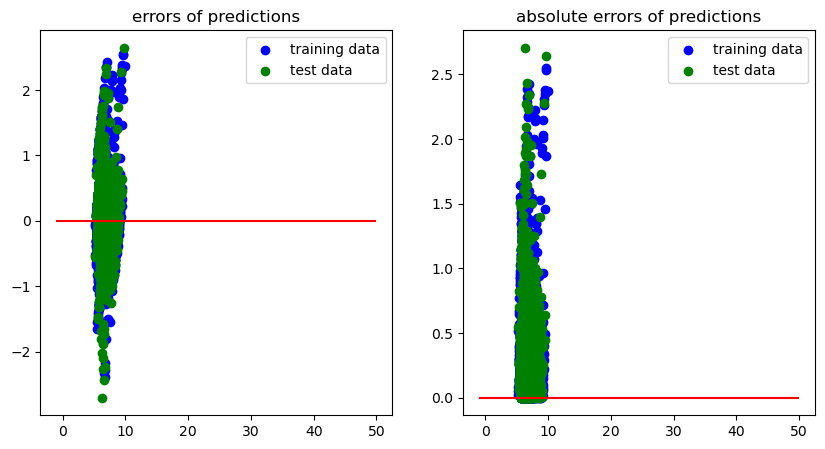

In [87]:
MAE = [0] * 10 
#linear regression
regressor = LinearRegression() 
parameters = {}
mae =gs_regression(regressor, parameters)

MAE[0]=mae


The best score is: -0.262108 using {'n_neighbors': 10, 'p': 1}
MAE  train 0.225 (252.999324)  test 0.251 (287.703371)


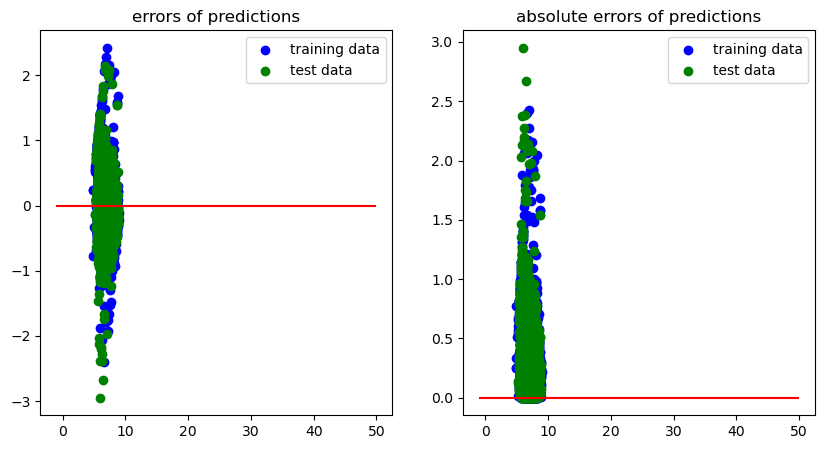

In [97]:
#k-nearest
regressor = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(10, 100, 10),'p': [1,2,3]}
mae=gs_regression(regressor, parameters)
MAE[1]=mae

The best score is: -0.297211 using {'alpha': 20}
MAE  train 0.294 (346.583447)  test 0.296 (359.175681)


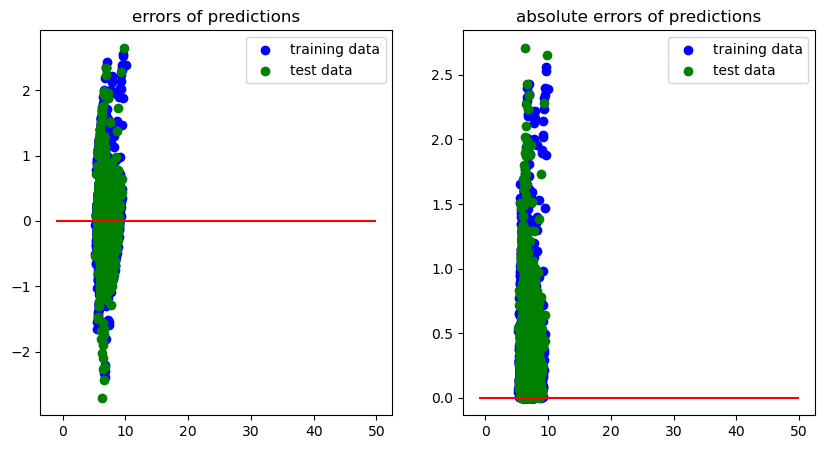

In [100]:
#ridge
regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10, 15, 20, 25,30,35]}#, "normalize": [True, False]}#we could remove normalize
mae=gs_regression(regressor, parameters)
MAE[2]=mae

The best score is: -0.292541 using {'max_depth': 9, 'min_samples_leaf': 25}
MAE  train 0.256 (291.510945)  test 0.284 (330.372161)


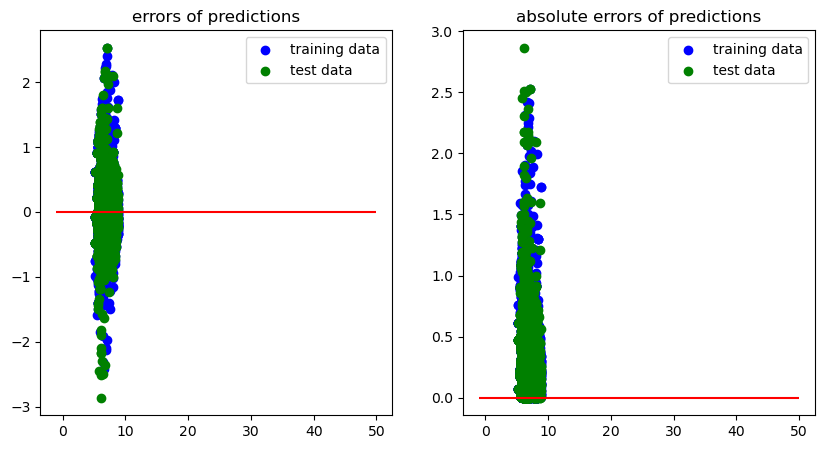

In [101]:
#regression tree
regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,20), "min_samples_leaf": np.arange(20,50,5)}
mae=gs_regression(regressor, parameters)
MAE[3]=mae

The best score is: -0.297026 using {'alpha': 0.0005}
MAE  train 0.294 (347.262539)  test 0.296 (359.045088)


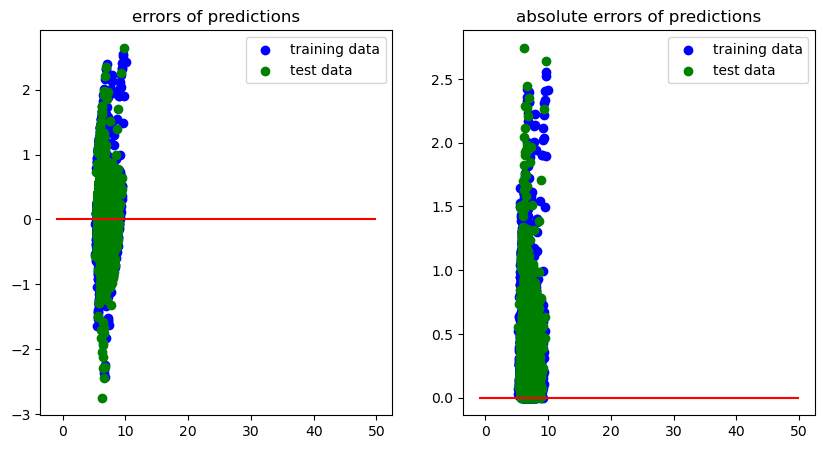

In [98]:
#lasso
regressor = Lasso()
parameters = {"alpha": [0.0001,0.0005,0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}
mae =gs_regression(regressor, parameters)
MAE[4]=mae

The best score is: -0.255173 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 20000, 'solver': 'sgd'}
MAE  train 0.243 (283.365263)  test 0.251 (297.139295)


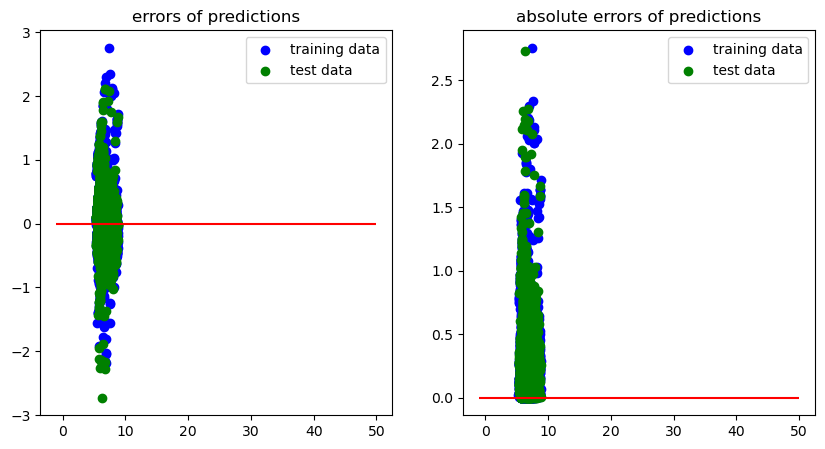

In [ ]:
#MPL regression
regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5),(10,5,3)],'solver' : ['sgd'],'batch_size': [20],'learning_rate' : ['constant'],'alpha':10.0 ** -np.arange(1, 3),'max_iter':[20000]}
mae=gs_regression(regressor, parameters)
MAE[5]=mae

The best score is: -0.314304 using {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200, 'random_state': 4}
MAE  train 0.315 (373.200419)  test 0.315 (380.597592)


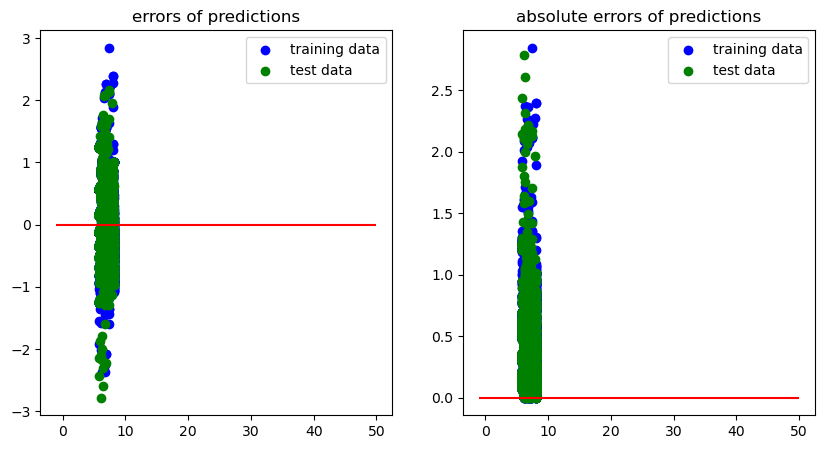

In [ ]:
#ada boost con decision tree regressor
regressor = AdaBoostRegressor()
parameters = {"n_estimators":[10,50,100,150,200], "learning_rate":[0.01, 0.1,0.5,1,2], "loss": ['linear', 'square'], "random_state" : [4]}
mae=gs_regression(regressor, parameters)
MAE[6]=mae

The best score is: -0.248619 using {'criterion': 'squared_error', 'min_samples_leaf': 2, 'n_estimators': 250, 'random_state': 42}
MAE  train 0.106 (123.243217)  test 0.240 (277.882380)


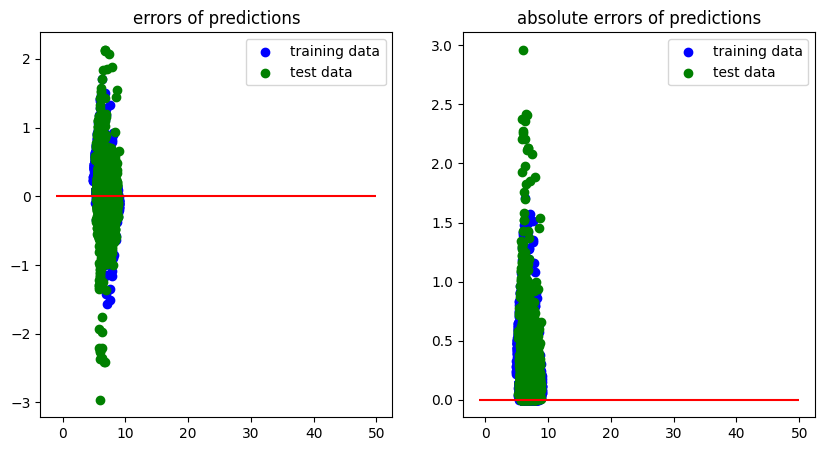

In [32]:
#random forest regression
regressor = RandomForestRegressor()
parameters = {"n_estimators":[150,200,250,300], "criterion": ['squared_error'], "min_samples_leaf": [2,4,5,7,10,30], "random_state" : [42]}
mae=gs_regression(regressor, parameters)
MAE[7]=mae

The best score is: -0.253736 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 0}
MAE  train 0.230 (259.787439)  test 0.251 (293.275964)


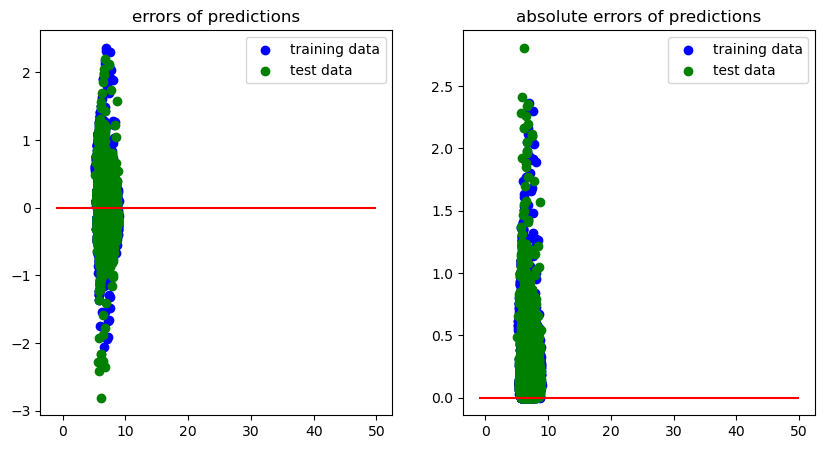

In [ ]:
#gradient boost
regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[200], "learning_rate":[0.1], "random_state" : [0] ,"max_depth":[3]}
mae=gs_regression(regressor, parameters)
MAE[8]=mae

The best score is: -0.294822 using {'C': 0.01, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
MAE  train 0.291 (354.023986)  test 0.292 (362.576077)


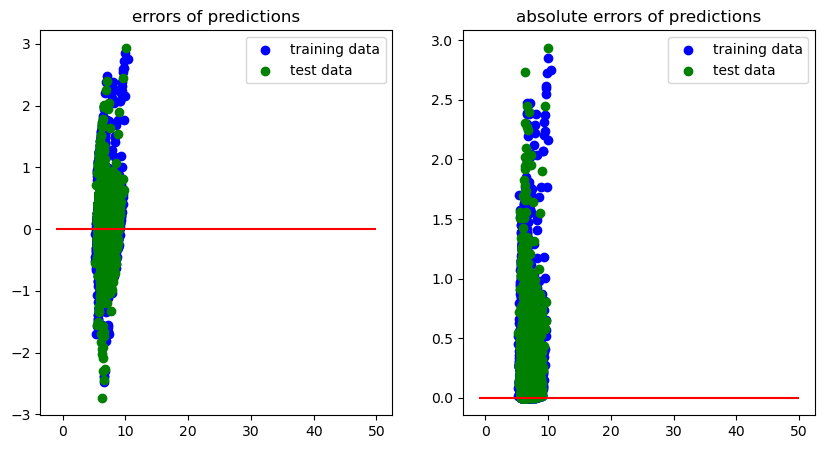

In [ ]:
#svr
regressor = SVR()
parameters = {'C': [0.001, 0.01,0.1,1,10,100],'epsilon': [0.001,0.1,1],'gamma':['auto'],'kernel': ['linear']} #tolgo poly se ci mette troppo
mae=gs_regression(regressor, parameters)
MAE[9]=mae

[0.2962637166670968, 0.29604786196828337, 0.29580959746670027, 0.2504344749212933, 0.28437377112172, 0.23970288936224513, 0.29229750704844276, 0.25142965644086723, 0.3146014693804229, 0.2505746230349704]


Text(0.5, 1.0, 'MSA Values')

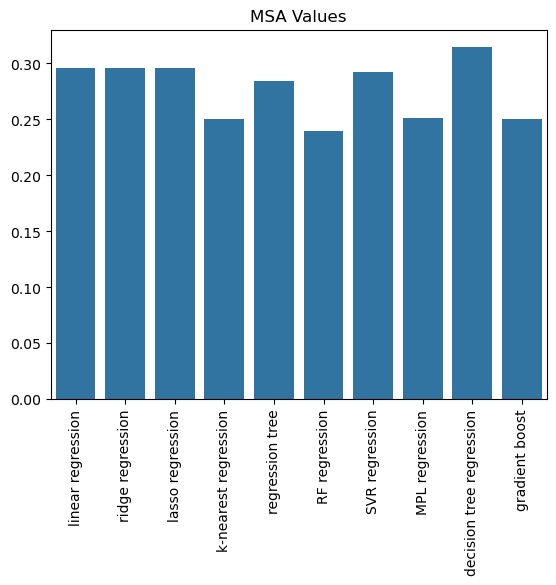

In [ ]:
#choosing best model
data = MAE
print(MAE)
sns.barplot(x=["linear regression","k-nearest regression","ridge regression","regression tree","lasso regression"
               "MPL regression","decision tree regression","RF regression","gradient boost", "SVR regression"], y=data)
plt.xticks(rotation=90)
plt.title('MAE Values')
#we can notice that the best model is obtained using the random forest regression

In [ ]:
# we redo the better test using all the data and not just the train data
regressor = RandomForestRegressor(
    n_estimators=250,
    criterion='squared_error',
    min_samples_leaf=2,
    random_state=42
)

regressor.fit(X, y)
y_pred=regressor.predict(X)

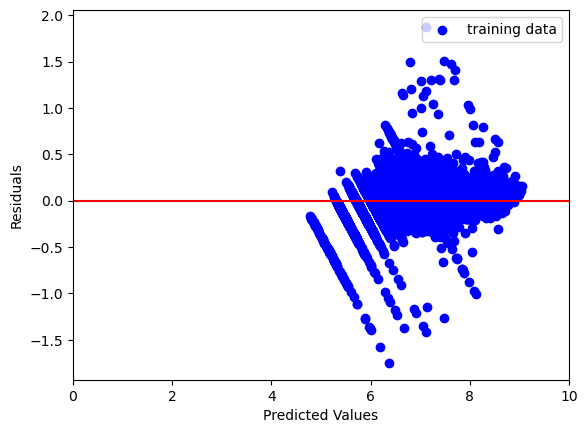

In [ ]:
#residual graph
error=y-y_pred

plt.scatter(y_pred,error, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper right")
plt.hlines(y=0, xmin=0, xmax=10, color="r")
plt.xlim([0,10])
plt.show()